# Car Details Analysis, EDA and Prediction using RFR

What is the problem statement?

The problem statement is to predict the price of the car based on the features of the car. The dataset contains the details of the car like the year of manufacture, the number of kilometers driven, the fuel type, the number of owners, the transmission.



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read the data
df = pd.read_csv('../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1067,Toyota Corolla Altis 1.8 VL AT,2010,350000,80000,Petrol,Individual,Automatic,Third Owner
1757,Honda City Corporate Edition,2013,495000,45241,Petrol,Dealer,Manual,First Owner
4292,Nissan Sunny Diesel XL,2012,300000,110000,Diesel,Individual,Manual,First Owner
158,Maruti Wagon R LXI,2020,240000,120000,Petrol,Individual,Manual,First Owner
1903,Ford Figo 1.5P Titanium AT,2017,774000,1758,Petrol,Dealer,Automatic,First Owner


In [3]:
# check the shape of the data
df.shape

(4340, 8)

In [4]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

763

In [6]:
# show duplicates
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [7]:
df = df.drop_duplicates()

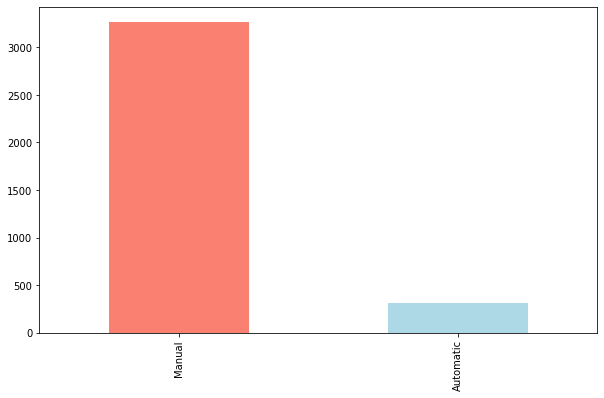

In [8]:
# EDA - Exploratory Data Analysis

df["transmission"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], figsize=(10, 6));

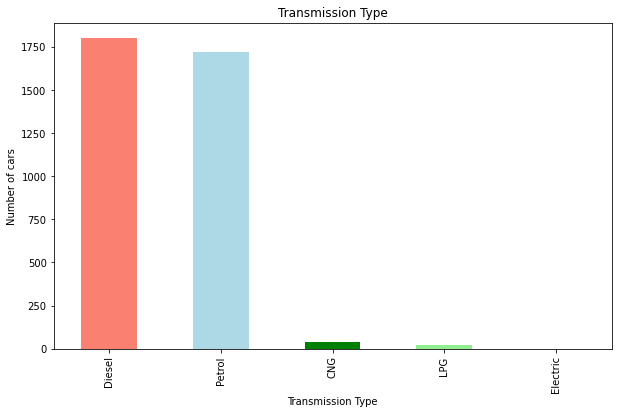

In [9]:
plt.title("Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Number of cars")
df["fuel"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "green", "lightgreen", "pink"], figsize=(10, 6));

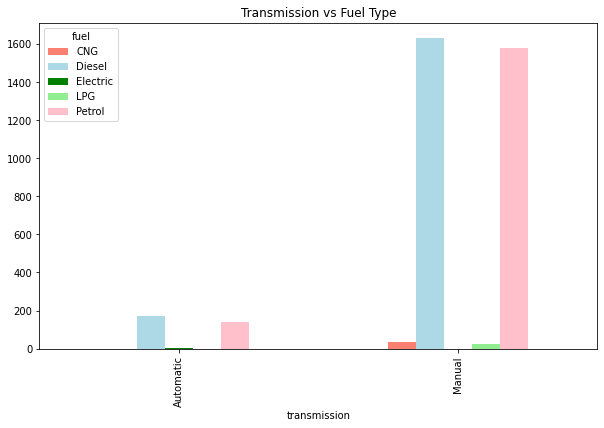

In [10]:
# transmision vs fuel type
pd.crosstab(df["transmission"], df["fuel"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue", "green", "lightgreen", "pink"], title="Transmission vs Fuel Type");

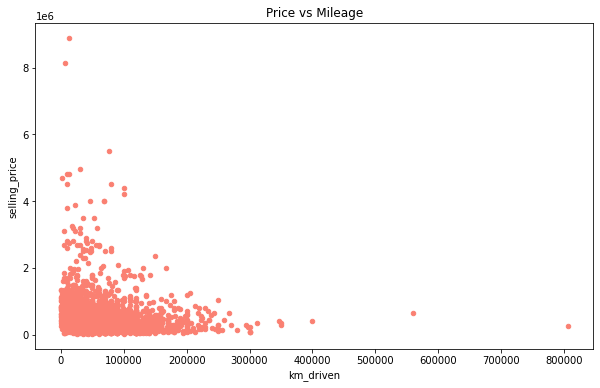

In [11]:
# price vs mileage
df.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(10, 6), title="Price vs Mileage", color="salmon");


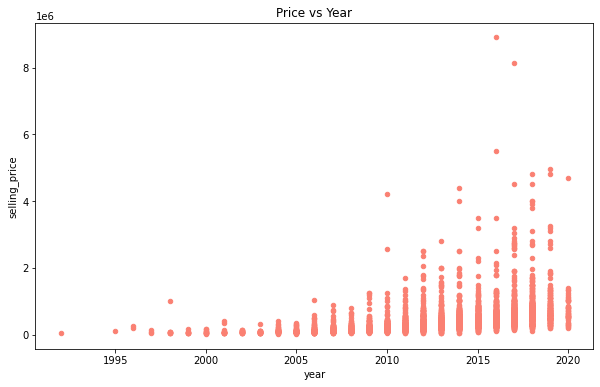

In [12]:
# year vs price
df.plot(x="year", y="selling_price", kind="scatter", figsize=(10, 6), title="Price vs Year", color="salmon");

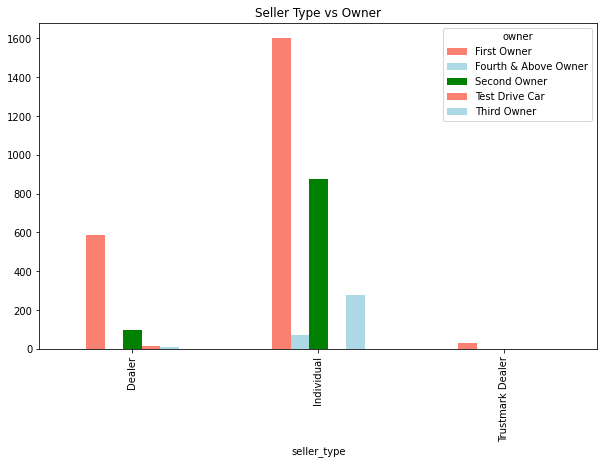

In [13]:
# seller type vs owner
pd.crosstab(df["seller_type"], df["owner"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue", "green"], title="Seller Type vs Owner");


In [14]:
# encoding categorical variables
df.drop("name", axis=1, inplace=True)
categorical_columns = df.select_dtypes(include="object").columns

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in categorical_columns:
    df[col] = label.fit_transform(df[col])

df.sample(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1882,2017,750000,15000,4,1,1,0
161,2014,620000,36000,4,1,1,0
726,2010,265000,47564,4,0,1,2
2641,2002,150000,50000,1,1,1,4
3969,2016,5500000,77350,1,0,0,0


In [15]:
# Using Random Forest Regressor to predict the selling price
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# split the data into X and y

X = df.drop("selling_price", axis=1)

y = df["selling_price"]

# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate the model

rf = RandomForestRegressor()




In [16]:
# fit the model

rf.fit(X_train, y_train)


RandomForestRegressor()

In [17]:
# predict the selling price

y_preds = rf.predict(X_test)

# evaluate the model

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_preds))
print("Mean Squared Error: ", mean_squared_error(y_test, y_preds))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_preds)))
print("R2 Score: ", r2_score(y_test, y_preds))


Mean Absolute Error:  194960.22543328285
Mean Squared Error:  185642257363.62738
Root Mean Squared Error:  430862.22550094523
R2 Score:  0.42370991773649125


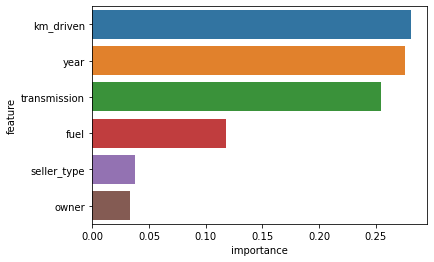

In [18]:
# plot the feature importance sns

feature_importance = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_})

feature_importance.sort_values(by="importance", ascending=False, inplace=True)

sns.barplot(x="importance", y="feature", data=feature_importance);

# Conclusion

Checking the plot of feature importance, the most important feature is km_drive, this is not surprising as the more the car is driven more wastage it will have so price is directly proportional to the km_drive.